# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from tqdm import tqdm

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.pipeline import Pipeline

# Data

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
0,4814dfa2-45a8-46b9-8102-98ecbbec2d2a,Navya,Vasa,7,10,8,12,10,13,5,...,0.0,1.0,3.0,4.0,1,3,4,1,0,0
1,bb0abe41-cc89-4a1d-bb1c-48bd212ae00d,Azad,Warrior,5,15,6,7,6,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
2,edfd1a62-05da-4cfd-b8ae-521f05f0fd5f,Piya,Jha,1,15,17,8,5,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
3,3eaa4c2a-2316-48f4-b1b0-4aafe2286630,Rhea,Varma,11,7,2,11,13,14,8,...,3.0,3.0,3.0,4.0,1,2,4,1,0,0
4,c9a73239-baae-40eb-8855-dab07767ea86,Sahil,Dave,12,14,9,8,11,6,13,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0


In [ ]:
data.shape

(1106674, 62)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

In [ ]:
data.describe()

,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
count,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,...,1.069126e+06,1.069519e+06,1.070131e+06,1.070629e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06
mean,9.149727e+00,9.433967e+00,8.231377e+00,8.408147e+00,8.282763e+00,7.273099e+00,8.193988e+00,9.715922e+00,2.332612e+00,2.993031e+00,...,2.328069e+00,2.359353e+00,2.393023e+00,3.529236e+00,1.029407e+00,2.758336e+00,3.599215e+00,1.001480e+00,1.282708e-01,1.910454e-01
std,5.746106e+00,5.747728e+00,4.776280e+00,5.282007e+00,4.565543e+00,5.094787e+00,4.321941e+00,5.844795e+00,1.247430e+00,6.411320e-01,...,1.238293e+00,1.217475e+00,1.193804e+00,1.081633e+00,2.931483e-01,4.686307e-01,1.011067e+00,4.470347e-02,3.343913e-01,3.931249e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,9.000000e+00,1.000000e+01,9.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,1.000000e+01,2.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.300000e+01,1.400000e+01,1.200000e+01,1.400000e+01,1.200000e+01,1.200000e+01,1.100000e+01,1.500000e+01,2.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.700000e+01,1.900000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.500000e+01,1.900000e+01,6.000000e+00,5.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00


# EDA

<Axes: xlabel='primary_close_flag,final_close_flag'>

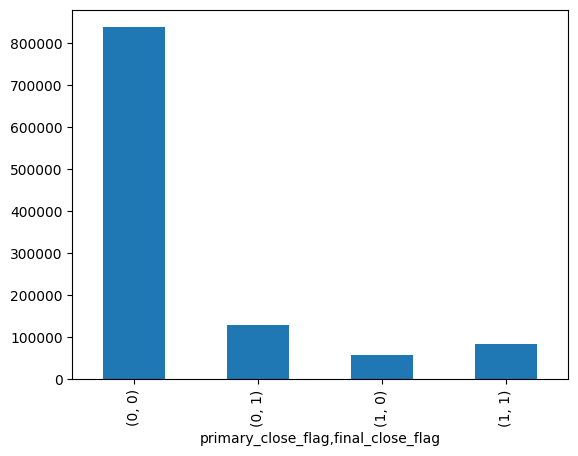

In [ ]:
# Data is imbalanced
data.groupby(['primary_close_flag','final_close_flag']).customer_id.count().plot(kind='bar')

In [ ]:
# There are less no. of unique customer ID's  as compared to no. of columns. Almost 10% of the customer ID's are unique
print(data.nunique())

customer_id                       98376
firstname                           208
lastname                            450
record_number                        46
days_since_opened                    20
                                  ...  
encoded_loans_credit_status           7
encoded_loans_credit_type             8
encoded_loans_account_currency        4
primary_close_flag                    2
final_close_flag                      2
Length: 62, dtype: int64


<ipython-input-11-4ccf95c27235>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=False,ax=ax)


<Axes: >

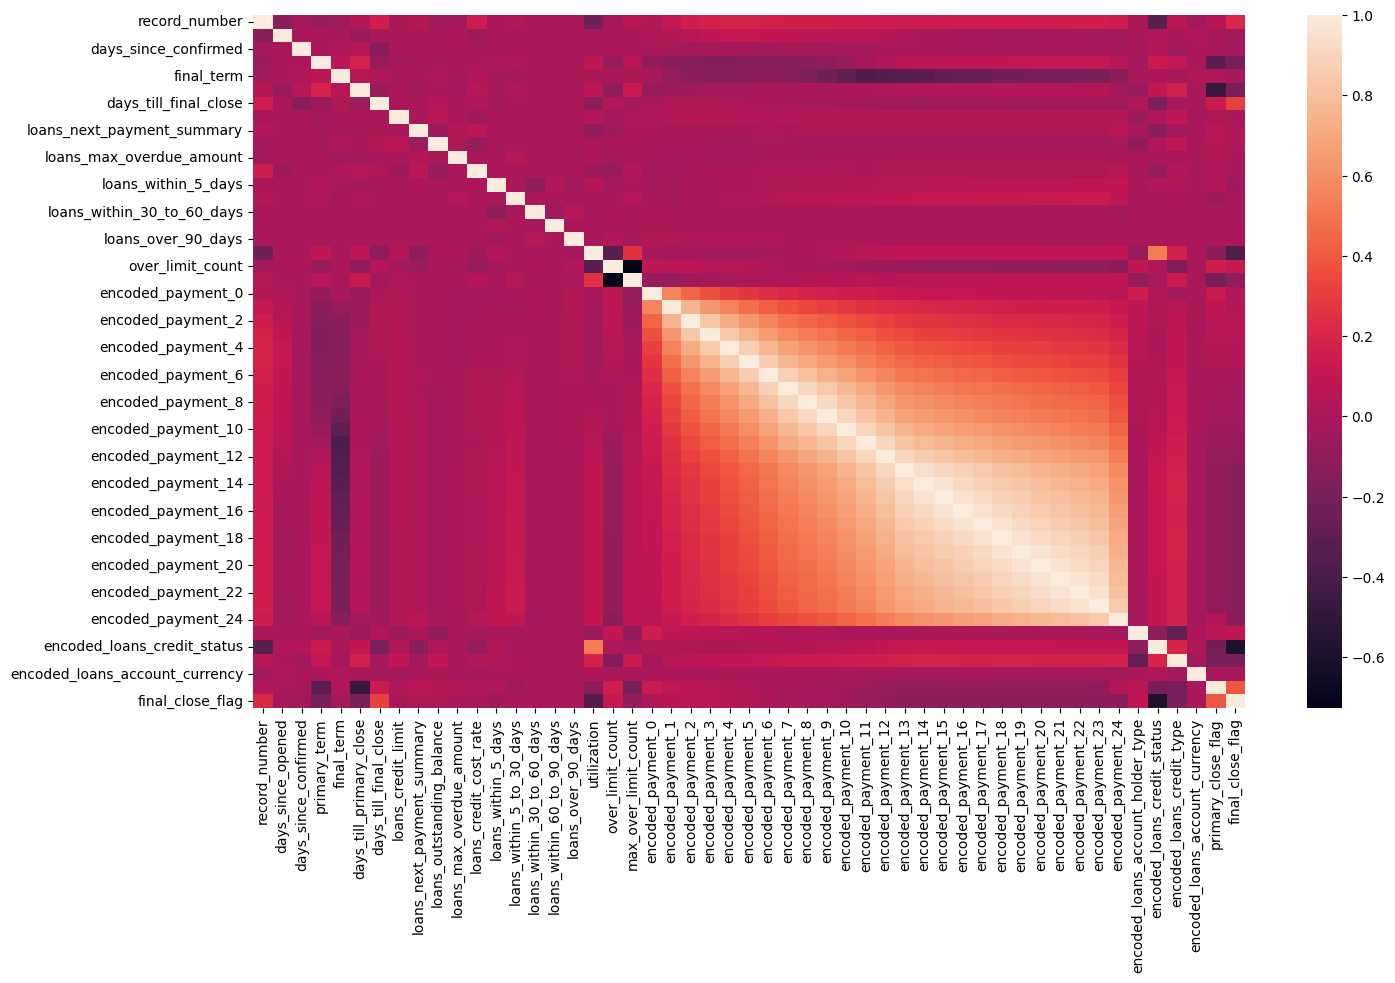

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.heatmap(data.corr(),annot=False,ax=ax)


<Axes: >

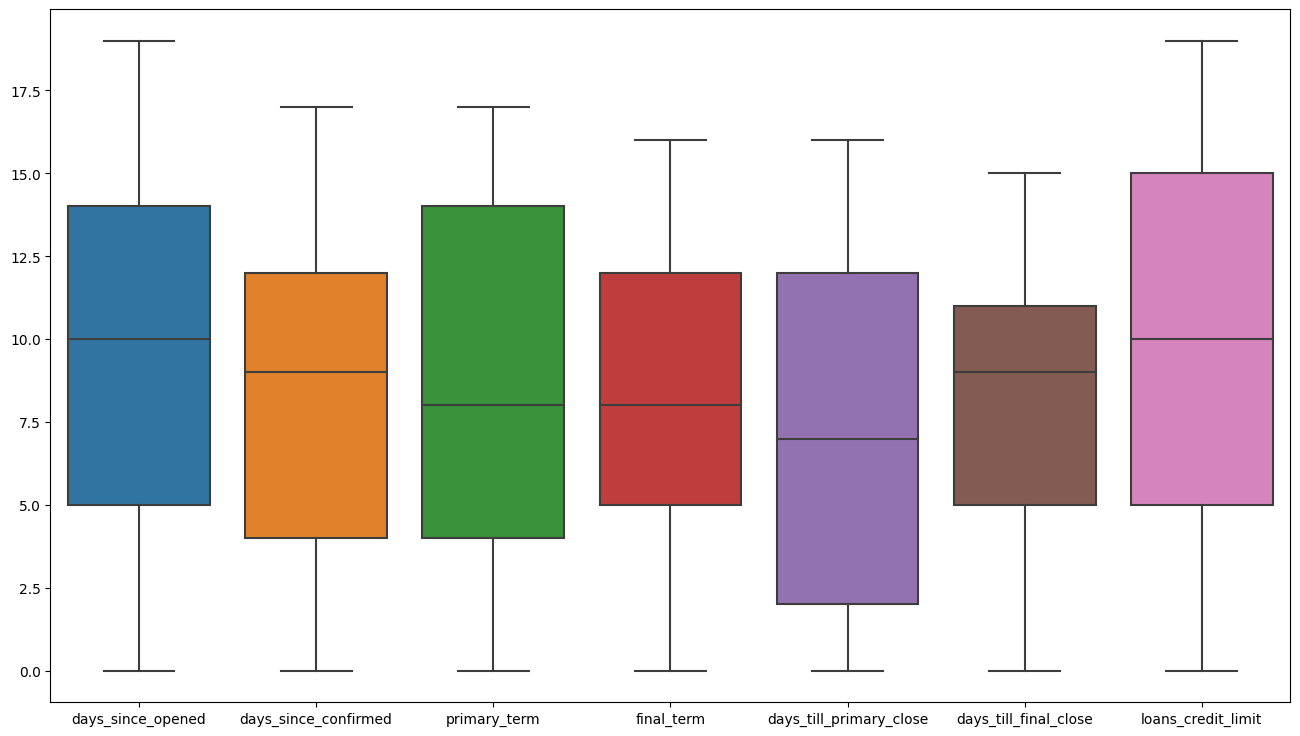

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.boxplot(data[['days_since_opened','days_since_confirmed','primary_term','final_term',
                            'days_till_primary_close','days_till_final_close','loans_credit_limit']],ax=ax)

<Axes: >

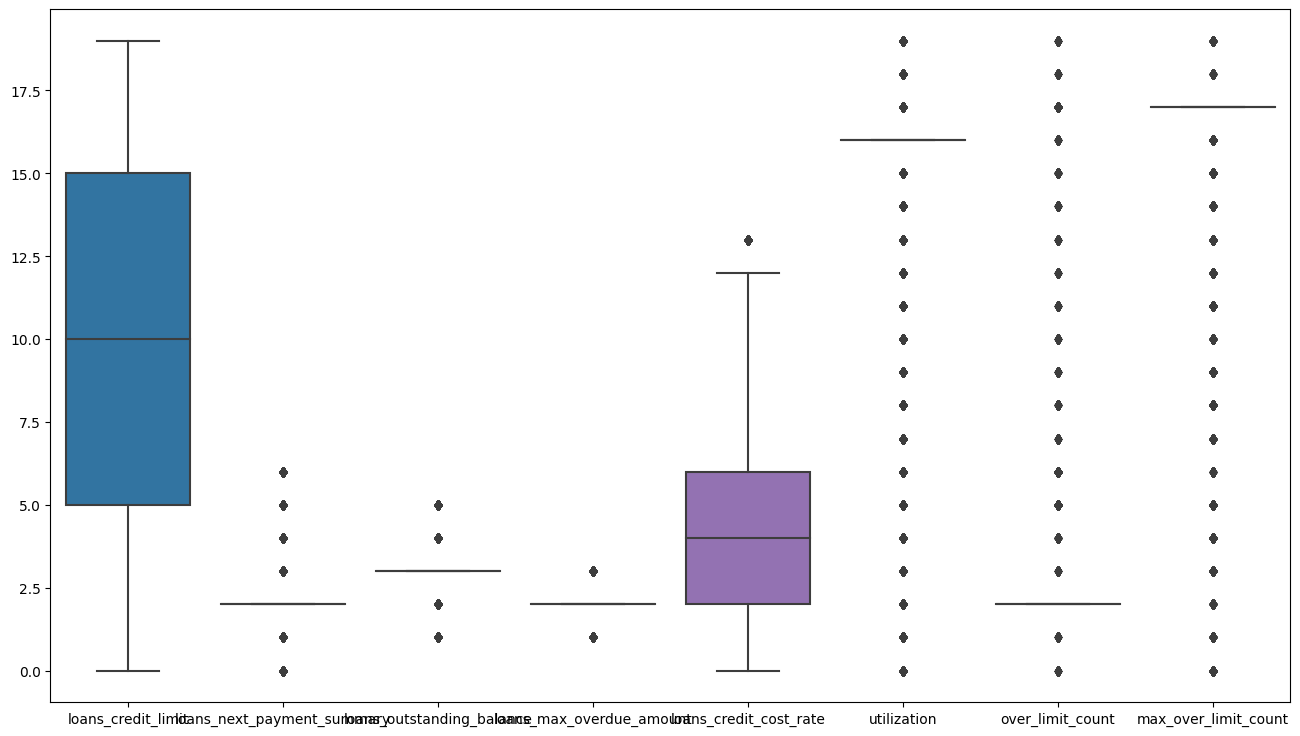

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.boxplot(data[['loans_credit_limit','loans_next_payment_summary','loans_outstanding_balance','loans_max_overdue_amount','loans_credit_cost_rate','utilization','over_limit_count','max_over_limit_count']],ax=ax)

In [ ]:
data[['is_zero_utilization','is_zero_over_limit_count','is_zero_max_over_limit_count']]

,is_zero_utilization,is_zero_over_limit_count,is_zero_max_over_limit_count
0,Yes,Yes,Yes
1,Yes,Yes,Yes
2,Yes,Yes,Yes
3,No,Yes,Yes
4,Yes,Yes,Yes
...,...,...,...
1106669,Yes,Yes,Yes
1106670,Yes,Yes,Yes
1106671,Yes,Yes,Yes
1106672,Yes,Yes,Yes


# Data Preprocessing

### Generating Labels

In [ ]:
data1 = data.copy()

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 36 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   days_since_opened                   1106674 non-null  int64  
 1   days_since_confirmed                1106674 non-null  int64  
 2   primary_term                        1106674 non-null  int64  
 3   final_term                          1106674 non-null  int64  
 4   days_till_primary_close             1106674 non-null  int64  
 5   days_till_final_close               1106674 non-null  int64  
 6   loans_credit_limit                  1106674 non-null  int64  
 7   loans_next_payment_summary          1106674 non-null  int64  
 8   loans_outstanding_balance           1106674 non-null  int64  
 9   loans_max_overdue_amount            1106674 non-null  int64  
 10  loans_credit_cost_rate              1106674 non-null  int64  
 11  loans_withi

In [ ]:
data1['Label'] = data1['primary_close_flag'].astype('str') +  " " + data1['final_close_flag'].astype('str')

In [ ]:
data1.drop(columns=['primary_close_flag','final_close_flag'],inplace=True)

### Reducing Dimensions of the Data (using PCA)

In [ ]:
encoded_data = data1[['encoded_payment_0','encoded_payment_1','encoded_payment_2','encoded_payment_3','encoded_payment_4','encoded_payment_5','encoded_payment_6','encoded_payment_7',
          'encoded_payment_8','encoded_payment_9','encoded_payment_10','encoded_payment_11','encoded_payment_12','encoded_payment_13','encoded_payment_14','encoded_payment_15',
          'encoded_payment_16','encoded_payment_17','encoded_payment_18','encoded_payment_19','encoded_payment_20','encoded_payment_21','encoded_payment_22','encoded_payment_23','encoded_payment_24']]

In [ ]:
encoded_data.fillna(0,inplace=True)

<ipython-input-19-c8482df0cd4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_data.fillna(0,inplace=True)


In [ ]:
pca = PCA(n_components=4)

In [ ]:
encode = pca.fit_transform(encoded_data)

In [ ]:
encode = pd.DataFrame(encode,columns=['Enc_Pay_1','Enc_Pay_2','Enc_Pay_3','Enc_Pay_4'])

In [ ]:
data1.drop(columns=['encoded_payment_0','encoded_payment_1','encoded_payment_2','encoded_payment_3','encoded_payment_4','encoded_payment_5','encoded_payment_6','encoded_payment_7',
          'encoded_payment_8','encoded_payment_9','encoded_payment_10','encoded_payment_11','encoded_payment_12','encoded_payment_13','encoded_payment_14','encoded_payment_15',
          'encoded_payment_16','encoded_payment_17','encoded_payment_18','encoded_payment_19','encoded_payment_20','encoded_payment_21','encoded_payment_22','encoded_payment_23','encoded_payment_24'],
           inplace=True)

In [ ]:
data1 = data1.join(encode)

<ipython-input-35-fc5e2a94b67b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=False,ax=ax)


<Axes: >

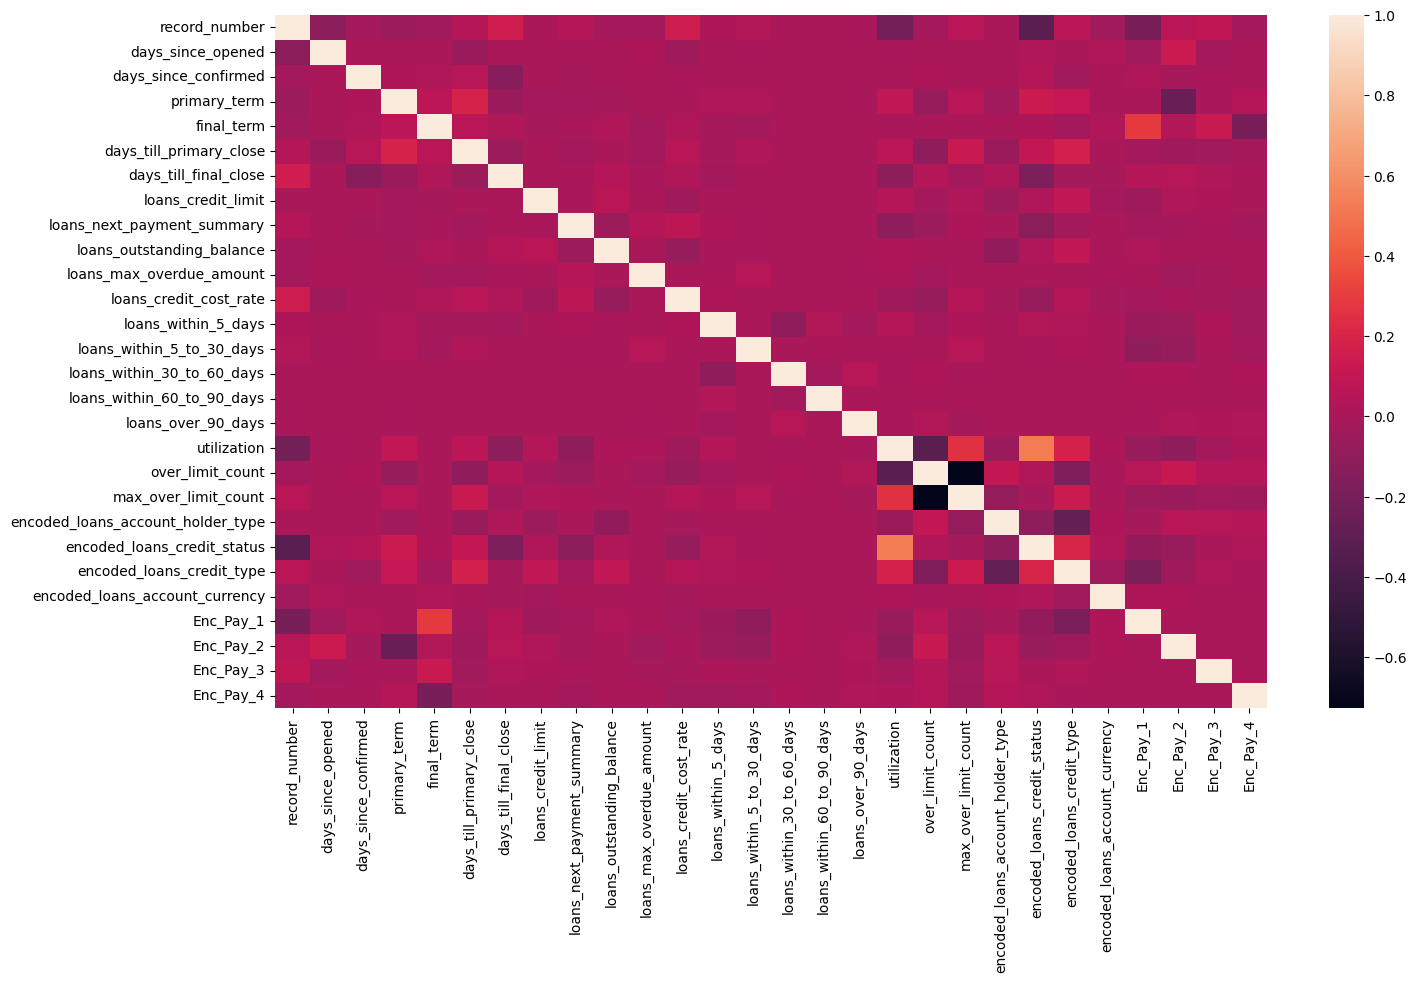

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
sns.heatmap(data1.corr(),annot=False,ax=ax)

In [ ]:
data1.columns

Index(['customer_id', 'firstname', 'lastname', 'record_number',
       'days_since_opened', 'days_since_confirmed', 'primary_term',
       'final_term', 'days_till_primary_close', 'days_till_final_close',
       'loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount',
       'loans_credit_cost_rate', 'loans_within_5_days',
       'loans_within_5_to_30_days', 'loans_within_30_to_60_days',
       'loans_within_60_to_90_days', 'loans_over_90_days',
       'is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_loans_account_holder_type',
       'encoded_loans_credit_status', 'encoded_loans_credit_type',
       'encoded_loans_account

In [ ]:
data1.drop(columns=['customer_id', 'firstname', 'lastname', 'record_number'],inplace=True)

In [ ]:
data1['is_zero_utilization'] = data1['is_zero_utilization'].apply(lambda x : 1 if x == 'Yes' else 0)
data1['is_zero_over_limit_count'] = data1['is_zero_over_limit_count'].apply(lambda x : 1 if x == 'Yes' else 0)
data1['is_zero_max_over_limit_count'] = data1['is_zero_max_over_limit_count'].apply(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
data1['is_zero_loans_within_5_days'] = data1['is_zero_loans_within_5_days'].apply(lambda x : 1 if x == 'Yes' else 0)
data1['is_zero_loans_within_5_to_30_days'] = data1['is_zero_loans_within_5_to_30_days'].apply(lambda x : 1 if x == 'Yes' else 0)
data1['is_zero_loans_within_30_to_60_days'] = data1['is_zero_loans_within_30_to_60_days'].apply(lambda x : 1 if x == 'Yes' else 0)
data1['is_zero_loans_within_60_to_90_days'] = data1['is_zero_loans_within_60_to_90_days'].apply(lambda x : 1 if x == 'Yes' else 0)
data1['is_zero_loans_over_90_days' ] = data1['is_zero_loans_over_90_days' ].apply(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 36 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   days_since_opened                   1106674 non-null  int64  
 1   days_since_confirmed                1106674 non-null  int64  
 2   primary_term                        1106674 non-null  int64  
 3   final_term                          1106674 non-null  int64  
 4   days_till_primary_close             1106674 non-null  int64  
 5   days_till_final_close               1106674 non-null  int64  
 6   loans_credit_limit                  1106674 non-null  int64  
 7   loans_next_payment_summary          1106674 non-null  int64  
 8   loans_outstanding_balance           1106674 non-null  int64  
 9   loans_max_overdue_amount            1106674 non-null  int64  
 10  loans_credit_cost_rate              1106674 non-null  int64  
 11  loans_withi

In [ ]:
X = data1[['days_since_opened', 'days_since_confirmed', 'primary_term','final_term', 'days_till_primary_close', 'days_till_final_close','loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount','loans_credit_cost_rate', 'loans_within_5_days','loans_within_5_to_30_days', 'loans_within_30_to_60_days','loans_within_60_to_90_days',
       'loans_over_90_days','is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days','is_zero_loans_within_30_to_60_days','is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count','is_zero_utilization', 'is_zero_over_limit_count','is_zero_max_over_limit_count', 'encoded_loans_account_holder_type',
       'encoded_loans_credit_status', 'encoded_loans_credit_type','encoded_loans_account_currency', 'Enc_Pay_1', 'Enc_Pay_2','Enc_Pay_3', 'Enc_Pay_4']]
Y_train = data1['Label']

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = pd.DataFrame(scaler.fit_transform(X))

### Test Data Preprocessing

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
encoded_data2 = test[['encoded_payment_0','encoded_payment_1','encoded_payment_2','encoded_payment_3','encoded_payment_4','encoded_payment_5','encoded_payment_6','encoded_payment_7',
          'encoded_payment_8','encoded_payment_9','encoded_payment_10','encoded_payment_11','encoded_payment_12','encoded_payment_13','encoded_payment_14','encoded_payment_15',
          'encoded_payment_16','encoded_payment_17','encoded_payment_18','encoded_payment_19','encoded_payment_20','encoded_payment_21','encoded_payment_22','encoded_payment_23','encoded_payment_24']]

In [ ]:
encoded_data2.fillna(0,inplace=True)

<ipython-input-73-3308c55113fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_data2.fillna(0,inplace=True)


In [ ]:
encode2 = pca.fit_transform(encoded_data2)

In [ ]:
encode2 = pd.DataFrame(encode2,columns=['Enc_Pay_1','Enc_Pay_2','Enc_Pay_3','Enc_Pay_4'])

In [ ]:
test.drop(columns=['encoded_payment_0','encoded_payment_1','encoded_payment_2','encoded_payment_3','encoded_payment_4','encoded_payment_5','encoded_payment_6','encoded_payment_7',
          'encoded_payment_8','encoded_payment_9','encoded_payment_10','encoded_payment_11','encoded_payment_12','encoded_payment_13','encoded_payment_14','encoded_payment_15',
          'encoded_payment_16','encoded_payment_17','encoded_payment_18','encoded_payment_19','encoded_payment_20','encoded_payment_21','encoded_payment_22','encoded_payment_23','encoded_payment_24'],
           inplace=True)

In [ ]:
test = test.join(encode2)

In [ ]:
test.drop(columns=['customer_id', 'firstname', 'lastname', 'record_number'],inplace=True)

In [ ]:
test['is_zero_utilization'] = test['is_zero_utilization'].apply(lambda x : 1 if x == 'Yes' else 0)
test['is_zero_over_limit_count'] = test['is_zero_over_limit_count'].apply(lambda x : 1 if x == 'Yes' else 0)
test['is_zero_max_over_limit_count'] = test['is_zero_max_over_limit_count'].apply(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
test['is_zero_loans_within_5_days'] = test['is_zero_loans_within_5_days'].apply(lambda x : 1 if x == 'Yes' else 0)
test['is_zero_loans_within_5_to_30_days'] = test['is_zero_loans_within_5_to_30_days'].apply(lambda x : 1 if x == 'Yes' else 0)
test['is_zero_loans_within_30_to_60_days'] = test['is_zero_loans_within_30_to_60_days'].apply(lambda x : 1 if x == 'Yes' else 0)
test['is_zero_loans_within_60_to_90_days'] = test['is_zero_loans_within_60_to_90_days'].apply(lambda x : 1 if x == 'Yes' else 0)
test['is_zero_loans_over_90_days' ] = test['is_zero_loans_over_90_days' ].apply(lambda x : 1 if x == 'Yes' else 0)

In [ ]:
X2 = test[['days_since_opened', 'days_since_confirmed', 'primary_term','final_term', 'days_till_primary_close', 'days_till_final_close','loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount','loans_credit_cost_rate', 'loans_within_5_days','loans_within_5_to_30_days', 'loans_within_30_to_60_days','loans_within_60_to_90_days',
       'loans_over_90_days','is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days','is_zero_loans_within_30_to_60_days','is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count','is_zero_utilization', 'is_zero_over_limit_count','is_zero_max_over_limit_count', 'encoded_loans_account_holder_type',
       'encoded_loans_credit_status', 'encoded_loans_credit_type','encoded_loans_account_currency', 'Enc_Pay_1', 'Enc_Pay_2','Enc_Pay_3', 'Enc_Pay_4']]

In [ ]:
X_test = pd.DataFrame(scaler.fit_transform(X2))

# Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = dtc.predict(X_test)

In [ ]:
Y_pred = pd.DataFrame(Y_pred,columns=['Label'])

In [ ]:
# data1['Label'] = data1['primary_close_flag'].astype('str') +  " " + data1['final_close_flag'].astype('str')

In [ ]:
Y_pred

,Label
0,0 0
1,0 0
2,0 0
3,0 0
4,0 0
...,...
474284,0 0
474285,0 0
474286,0 0
474287,0 0


In [ ]:
Y_pred['primary_close_flag'] = Y_pred['Label'].apply(lambda x: x.split()[0])
Y_pred['final_close_flag'] = Y_pred['Label'].apply(lambda x: x.split()[1])

In [ ]:
Y_pred.drop(columns='Label',inplace=True)

In [ ]:
Y_pred.to_csv('Submissions.csv',index=False)